In [8]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def expected_run(n):
    k = 0
    baserunner = 0
    runs = 0
    total_run = []
    for i in range(41):
        if n[i] == "K":
            k += 1
            if k == 3:    
                total_run.append(runs)
                runs = 0
                k = 0
                baserunner = 0
        elif n[i] == "B":
            if baserunner == 3:
                runs += 1
                baserunner = 3
            else:
                baserunner += 1
        elif n[i] == "H":   
            runs = baserunner + 1
            baserunner = 0
    sum_run = sum(total_run)
    return sum_run
    
train = 20000
sum_of_run = 0
for i in range (train):
    game = ['B'] * 10 + ['K'] * 26 + ['H'] * 4
    random.shuffle(game)
    game.append("K")
    sum_of_run += expected_run(game)

print("expected runs scoer per inning =", sum_of_run/(train*9))


expected runs scoer per inning = 0.6045388888888888


<Axes: xlabel='runs_per_inning', ylabel='count'>

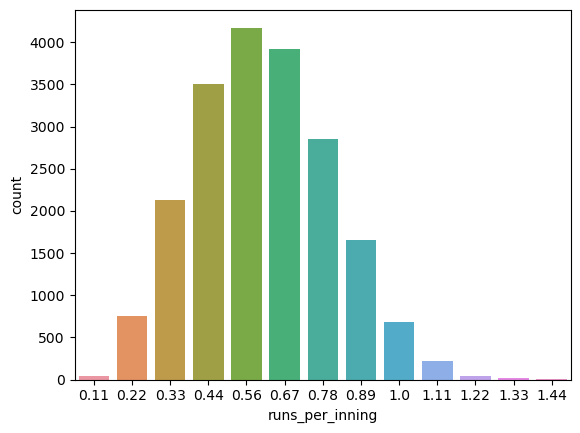

In [11]:
graph = []
for i in range (train):
    game = ['B'] * 10 + ['K'] * 26 + ['H'] * 4
    random.shuffle(game)
    game.append("K")
    innin_run = round((expected_run(game)/9),2)
    graph.append(innin_run)

df = pd.DataFrame(graph, columns=['runs_per_inning'])

sns.countplot(x='runs_per_inning', data = df)

'''
Even though the avg is around 0.6, but the mode of run score per inning is 0.56. 

'''